<a href="https://colab.research.google.com/github/teagoz/MTEch-Desafio/blob/main/Equipe_NULL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DESAFIO MTEch
-----------------------
***Equipe NULL***

*Por Marina Eicardi e Tiago Zavarizi*


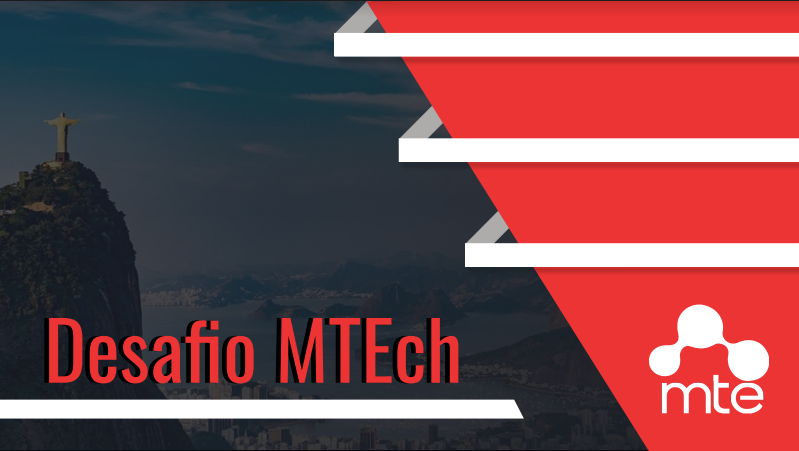

> A equipe faz parte da  empresa de consultoria, a MTEch Consulting Solutions, que foi contratada por uma agência de Turismo do Rio de Janeiro, a Viajar+, para ajudar na formulação de novos pacotes de viagem e impedir sua falência. Essa agência sofreu muito com a pandemia e precisa urgentemente de ajuda para retomar as atividades, vendendo, em 2021, pacotes de viagens para 2023.



> A Equipe NULL irá criar um 1 pacote de viagem diferenciado e inovador, justamente para que a Viajar+ possa atrair novos clientes e se destacar no mercado mais uma vez.





#1. Informações

1.1 Perfil escolhido

> O perfil escolhido pela dupla foi o **Perfil 3**. O perfil é sobre uma pessoa solteira de aproximadamente 45 anos

> Esta pessoa está planejando a viagem durante muito tempo e está muito ansiosa para fazer de tudo
no Rio de Janeiro. Durante a viagem, ela gostaria de conhecer o Jardim Botânico, tendo em vista que é
apaixonada por flores. Além disso, ela também é muito interessada em trilhas e ecoturismo. Vale ressaltar
que a pessoa é fumante e ainda precisará trabalhar por um dos dias na viagem, portanto necessita de
internet.
Ela planejou um gasto de até 1000 reais durante os 4 dias de viagem (acomodação e taxas + entrada
nos pontos turísticos + transporte entre acomodação e pontos turísticos). Ela utiliza apenas o transporte
individual (táxi ou aplicativo) com um preço fixo por quilômetro. 



1.2 Acomodação proposta

> **ID**: 29751978

> Características: 

>Quarto muito confortável para 1 ou 2 pessoas, do ladinho da praia de Copacabana, do Forte de Copacabana e próximo da estação de metrô General Osório (Ipanema)! Na mesma rua existem excelentes restaurantes, boate e bares super legais! Perto de bancos, casas de câmbio, padarias, mercados e farmácias, em uma área muito segura e agradável

>Comodidades:

> * Banheiro: água quente. 
> * Quarto e Lavanderia: 
>  1. Máquina de Lavar.
>  2. Básico (Toalhas, lençóis, sabonete e papel higiênico)
>  3. Cabides
>  4. Roupa de cama
>  5. Cobertores e travesseiros extras
>  6. Ferro de passar
> * Entretenimento
>  1. TV com TV a cabo
>* Segurança doméstica
>  1. Detector de fumaça
>  2. Alarme de monóxido de carbono
>* Internet e escritório
>  1. Wi-Fi (Disponível em toda a acomodação)
>  2. Espaço de trabalho exclusivo
>* Cozinha e sala de jantar
>Cozinha
>  1. Espaço onde os hóspedes podem preparar suas próprias refeições
>  2. Refrigerador
>  3. Microondas
>  4. Fogão
>   5. Forno
>   6. Cafeteira
>* Estacionamento e instalações
>  1. Estacionamento gratuito na rua
>  2. Elevador
>* Serviços
>  1. Permitido fumar
>  2. Estadias de longa duração são permitidas
>  3. Self check-In
>  4. O anfitrião recebe você
>  5. Cofre

>*Informado pelo anfitrião*



1.3 Pontos turísticos inclusos no pacote


> Pré definido: **Jardim Botânico**
 * Valor do ingresso: 60 reais
 * Deslocamento ida e volta:  37,70 reais

> Ponto obrigatório livre: **Trilha do Corcovado**
  * Valor: 200 reais
  * Deslocamento ida e volta: 89,50 reais

>*Trilha com guia oferecida pela Nattrip*
(https://www.nattrip.com.br/roteiros/trilha-do-corcovado/)

> Pontos turísticos extras:
*   Parque da Catacumba - (13,70 reais) - apenas valor de deslocamento ida e volta
*   Feira de São Cristóvão (81,00 reais)  - apenas valor de deslocamento ida e volta




1.4 Custo total do pacote

> Custo total: R$ 899,99
 
> Item inclusos: 
*   Valor do aluguel + despesas da acomodação: R\$ 420,00
*   Custo de acesso aos pontos turísticos: R\$ 260,00
*   Custos com deslocamento (ida e volta): R\$ 216,69

1.5 Considerações

> Preço táxi/corrida de apps por km é igual a R$ 3,00.

> Para medição da distância entre acomodação e
pontos turísticos não deve-se considerar o
endereço da acomodação, mas sim o endereço
do bairro.

> O trânsito não deve ser levado em conta,
portanto, apenas medir o custo de deslocamento
levando em conta a quilometragem a ser
percorrida

>Não levar em consideração gastos extras
(alimentação, gorjetas, passagem para o Rio de
Janeiro, presentes, etc);







###1. Importando a base de dados


In [ ]:
from google.colab import drive

drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import json

api_file = open('/content/drive/MyDrive/DESAFIO MTEch - NULL/APIkey.txt', 'r')
api_key = api_file.read()
api_file.close()

url = 'https://maps.googleapis.com/maps/api/distancematrix/json?'

dados = pd.read_csv('/content/drive/MyDrive/DESAFIO MTEch - NULL/base_desafio_MTEch_2021.csv')

In [ ]:
def checkDistance(key, bairro, destino, url):

  r = requests.get(url + 'origins=' + 'bairro+' + bairro + '&destinations=' + destino + '&key=' + key)
  
  dist = r.json()["rows"][0]["elements"][0]["distance"]["value"]

  return dist/1000

###2. Tratamento e filtração dos dados

2.1 Acomodações que possuem 4 noites mínimas

In [ ]:
#Filtrando a coluna 'noites mínimas' para localizar apenas as acomodações
#que possuem 4 noites mínimas, conforme o perfil escolhido.

dados = dados.loc[(dados['noites_mínimas'] <= 4)]

dados

,id,link_da_acomodacão,nome,resumo,o_espaço,descrição,visao_geral_bairro,observações,transito,acesso,interacao,regras_da_casa,link_da_foto,host_id,host_url,nome_host,inicio_host,superhost,numero_de_acomodacoes_host,verificações_do_host,host_tem_foto_perfil,host_tem_identidade_verificada,bairro,cidade,estado,CEP,localização_é_exata,tipo_de_propriedade,tipo_de_quarto,banheiros,quartos,camas,facilidades,metros_quadrados,preço,taxa_de_limpeza,pessoas_inclusas_no_preço,noites_mínimas,noites_máximas,número de reviews,primeira_review,última_review,avaliação_geral,avaliação_limpeza,avaliação_checkin,avaliacao_comunicação_host,avaliação_localização,avaliações_por_mês
0,17878,https://www.airbnb.com/rooms/17878,Very Nice 2Br - Copacabana - WiFi,Pls note that special rates apply for Carnival...,- large balcony which looks out on pedestrian ...,Pls note that special rates apply for Carnival...,This is the best spot in Rio. Everything happe...,NaN,Excellent location. Close to all major public ...,The entire apartment is yours. It's like your ...,I will be available throughout your stay shoul...,Please leave the apartment in a clean fashion ...,https://a0.muscache.com/im/pictures/65320518/3...,68997,https://www.airbnb.com/users/show/68997,Matthias,2010-01-08,t,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,Copacabana,Rio de Janeiro,Rio de Janeiro,22020-050,t,Condominium,Entire home/apt,1.0,2.0,2.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$332.00,$378.00,2,4,30,243,2010-07-15,2019-11-11,93.0,10.0,10.0,10.0,10.0,2.13
2,31560,https://www.airbnb.com/rooms/31560,NICE & COZY 1BDR - IPANEMA BEACH,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,Die Nachbarschaft von Ipanema ist super lebend...,NaN,"Bus, U-Bahn, Taxi und Leihfahrräder in der Nähe.","Die Urlauber dürfen das Badezimmer benutzen, d...",NaN,"So far, I haven't had any problems with guests...",https://a0.muscache.com/im/pictures/83114449/2...,135635,https://www.airbnb.com/users/show/135635,Renata,2010-05-31,t,1.0,"['email', 'phone', 'manual_online', 'facebook'...",t,t,Ipanema,Rio de Janeiro,RJ,22410-003,t,Apartment,Entire home/apt,1.0,1.0,2.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$273.00,$84.00,2,2,1125,271,2010-07-11,2019-11-21,96.0,10.0,10.0,10.0,10.0,2.38
3,35636,https://www.airbnb.com/rooms/35636,Cosy flat close to Ipanema beach,This cosy apartment is just a few steps away ...,"The location is extremely convenient, safe and...",This cosy apartment is just a few steps away ...,The apartment street is very quiet and safe ....,Please include the following information with ...,Metro stop just 5 blocks from our place. Buses...,NaN,NaN,"Dear Guest, Welcome! We hope you enjoy our apa...",https://a0.muscache.com/im/pictures/20009355/3...,153232,https://www.airbnb.com/users/show/153232,Patricia,2010-06-27,t,1.0,"['email', 'phone', 'facebook', 'reviews', 'man...",t,t,Ipanema,Rio de Janeiro,Rio de Janeiro,22081-020,t,Apartment,Entire home/apt,1.5,1.0,2.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$378.00,$172.00,2,2,89,169,2013-10-22,2019-11-13,94.0,9.0,10.0,10.0,10.0,2.28
4,35764,https://www.airbnb.com/rooms/35764,COPACABANA SEA BREEZE - RIO - 20 X Superhost,Our newly renovated studio is located in the b...,"FEEL LIKE YOUR HOME LIVING AS ""CARIOCA"" LOCAL ...",Our newly renovated studio is located in the b...,Our guests will experience living with a local...,Our guests no need to worry about breakfast a...,There are convenient public transportantion li...,Our guests have quick access to the beach and ...,We are available whenever the guest needs help...,"Pede-se carteira de identidade, CPF e comprova...",https://a0.muscache.com/im/pictures/6992951/b8...,153691,https://www.airbnb.com/users/show/153691,Patricia Miranda & Paulo,2010-06-27,t,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,Copacabana,Rio de Janeiro,RJ,210

2.2 Encontrando diárias menores que o orçamento

In [ ]:
#Alterando conteúdo das colunas 'preço' e 'taxa de limpeza' 
#de object para float.
for column in ['preço', "taxa_de_limpeza"]:
 dados[column]= dados[column].replace('[\$\,]','', regex=True).astype(float)

In [ ]:
#Preenchendo como 0 os NaNs da coluna 'taxa de limpeza'
#para indicar que não há taxa

dados['taxa_de_limpeza'].fillna(0, inplace=True)

dados['taxa_de_limpeza']

0        378.0
2         84.0
3        172.0
4        140.0
5        150.0
         ...  
33709      0.0
33710    150.0
33712     50.0
33713      0.0
33714      0.0
Name: taxa_de_limpeza, Length: 26190, dtype: float64

In [ ]:
#Filtrando apenas acomodações que não ultrapassam o orçamento
dados = dados.loc[(dados['preço']*4 + dados['taxa_de_limpeza'] <= 1000)]

dados

,id,link_da_acomodacão,nome,resumo,o_espaço,descrição,visao_geral_bairro,observações,transito,acesso,interacao,regras_da_casa,link_da_foto,host_id,host_url,nome_host,inicio_host,superhost,numero_de_acomodacoes_host,verificações_do_host,host_tem_foto_perfil,host_tem_identidade_verificada,bairro,cidade,estado,CEP,localização_é_exata,tipo_de_propriedade,tipo_de_quarto,banheiros,quartos,camas,facilidades,metros_quadrados,preço,taxa_de_limpeza,pessoas_inclusas_no_preço,noites_mínimas,noites_máximas,número de reviews,primeira_review,última_review,avaliação_geral,avaliação_limpeza,avaliação_checkin,avaliacao_comunicação_host,avaliação_localização,avaliações_por_mês
4,35764,https://www.airbnb.com/rooms/35764,COPACABANA SEA BREEZE - RIO - 20 X Superhost,Our newly renovated studio is located in the b...,"FEEL LIKE YOUR HOME LIVING AS ""CARIOCA"" LOCAL ...",Our newly renovated studio is located in the b...,Our guests will experience living with a local...,Our guests no need to worry about breakfast a...,There are convenient public transportantion li...,Our guests have quick access to the beach and ...,We are available whenever the guest needs help...,"Pede-se carteira de identidade, CPF e comprova...",https://a0.muscache.com/im/pictures/6992951/b8...,153691,https://www.airbnb.com/users/show/153691,Patricia Miranda & Paulo,2010-06-27,t,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,Copacabana,Rio de Janeiro,RJ,21031-300,t,Loft,Entire home/apt,1.0,1.0,1.0,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",0.0,130.0,140.0,2,3,28,316,2010-10-03,2019-11-16,98.0,10.0,10.0,10.0,10.0,2.84
5,35893,https://www.airbnb.com/rooms/35893,Copa Tabajaras,"Very quiet flat, with view on tropical jungle ...","Purpose of CopaTabajaras is to provide a nice,...","Very quiet flat, with view on tropical jungle ...","Copacabana is the heart of Rio de Janeiro, wit...",NaN,Very close to Siqueira Campos Metro Station,You 'll have an access to 1 or 2 bedrooms 1 pr...,I can easily support my guests with important ...,NaN,https://a0.muscache.com/im/pictures/5979525/42...,154043,https://www.airbnb.com/users/show/154043,Seba,2010-06-28,f,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,Copacabana,Rio de Janeiro,Rio de Janeiro,22031-112,t,Apartment,Private room,1.0,1.0,1.0,"{Wifi,Kitchen,""Free parking on premises"",Eleva...",NaN,151.0,150.0,1,2,30,1,2012-06-25,2012-06-25,NaN,NaN,NaN,NaN,NaN,0.01
7,48726,https://www.airbnb.com/rooms/48726,Rio de Janeiro Copacabana Ipanema,"Apartamento tem três dormitórios, dois banheir...",Excelente acomodação perto da praia mais famos...,"Apartamento tem três dormitórios, dois banheir...","Amo a paisagem, arvores a proximidade da praia...","O amnbiente é muito agradável, excelente local...","Sim vários, metros e ônibus na porta. Do Aerop...","Os hospedes tem acesso a lavanderia, cozinha p...",Sou muito extrovertida gosto de uma boa conver...,"Com gentileza, educação respeito mas sentindo-...",https://a0.muscache.com/im/pictures/dab394ab-c...,221941,https://www.airbnb.com/users/show/221941,Vana,2010-09-02,t,2.0,"['phone', 'facebook', 'reviews', 'offline_gove...",t,f,Copacabana,Rio de Janeiro,RJ,22081-025,t,Apartment,Private room,1.0,1.0,1.0,"{TV,""Cable TV"",Wifi,""Air conditioning"",Breakfa...",861.0,80.0,0.0,1,3,30,42,2017-11-03,2019-08-08,98.0,10.0,10.0,10.0,10.0,1.68
9,49179,https://www.airbnb.com/rooms/49179,Djalma Ocean View - #100A,Amazing 12th Floor Ocean View Condo. Queen Siz...,Apartment in Copacabana with stunning sea view...,Amazing 12th Floor Ocean View Condo. Queen Siz...,NaN,+ Actual Electric My representative with read ...,Metro Station Cantagalo is 3 blocks away. Buse...,You can access the entire private apartment in...,Once you book I will share my (Hidden by Airbn...,+ Actual Electric My representative with read ...,https://a0.muscache.com/im/pictures/9a4f46f5-c...,224192,https://www.airbnb.com/users/show/224192,David,2010-09-05,f,48.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,

2.3 Acomodações por número de camas relacionado ao perfil

In [ ]:
#Filtrando acomodações que possuem número de camas para uma pessoa
dados = dados.loc[(dados['camas'] <= 1)]

dados

,id,link_da_acomodacão,nome,resumo,o_espaço,descrição,visao_geral_bairro,observações,transito,acesso,interacao,regras_da_casa,link_da_foto,host_id,host_url,nome_host,inicio_host,superhost,numero_de_acomodacoes_host,verificações_do_host,host_tem_foto_perfil,host_tem_identidade_verificada,bairro,cidade,estado,CEP,localização_é_exata,tipo_de_propriedade,tipo_de_quarto,banheiros,quartos,camas,facilidades,metros_quadrados,preço,taxa_de_limpeza,pessoas_inclusas_no_preço,noites_mínimas,noites_máximas,número de reviews,primeira_review,última_review,avaliação_geral,avaliação_limpeza,avaliação_checkin,avaliacao_comunicação_host,avaliação_localização,avaliações_por_mês
4,35764,https://www.airbnb.com/rooms/35764,COPACABANA SEA BREEZE - RIO - 20 X Superhost,Our newly renovated studio is located in the b...,"FEEL LIKE YOUR HOME LIVING AS ""CARIOCA"" LOCAL ...",Our newly renovated studio is located in the b...,Our guests will experience living with a local...,Our guests no need to worry about breakfast a...,There are convenient public transportantion li...,Our guests have quick access to the beach and ...,We are available whenever the guest needs help...,"Pede-se carteira de identidade, CPF e comprova...",https://a0.muscache.com/im/pictures/6992951/b8...,153691,https://www.airbnb.com/users/show/153691,Patricia Miranda & Paulo,2010-06-27,t,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,Copacabana,Rio de Janeiro,RJ,21031-300,t,Loft,Entire home/apt,1.0,1.0,1.0,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",0.0,130.0,140.0,2,3,28,316,2010-10-03,2019-11-16,98.0,10.0,10.0,10.0,10.0,2.84
5,35893,https://www.airbnb.com/rooms/35893,Copa Tabajaras,"Very quiet flat, with view on tropical jungle ...","Purpose of CopaTabajaras is to provide a nice,...","Very quiet flat, with view on tropical jungle ...","Copacabana is the heart of Rio de Janeiro, wit...",NaN,Very close to Siqueira Campos Metro Station,You 'll have an access to 1 or 2 bedrooms 1 pr...,I can easily support my guests with important ...,NaN,https://a0.muscache.com/im/pictures/5979525/42...,154043,https://www.airbnb.com/users/show/154043,Seba,2010-06-28,f,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,Copacabana,Rio de Janeiro,Rio de Janeiro,22031-112,t,Apartment,Private room,1.0,1.0,1.0,"{Wifi,Kitchen,""Free parking on premises"",Eleva...",NaN,151.0,150.0,1,2,30,1,2012-06-25,2012-06-25,NaN,NaN,NaN,NaN,NaN,0.01
7,48726,https://www.airbnb.com/rooms/48726,Rio de Janeiro Copacabana Ipanema,"Apartamento tem três dormitórios, dois banheir...",Excelente acomodação perto da praia mais famos...,"Apartamento tem três dormitórios, dois banheir...","Amo a paisagem, arvores a proximidade da praia...","O amnbiente é muito agradável, excelente local...","Sim vários, metros e ônibus na porta. Do Aerop...","Os hospedes tem acesso a lavanderia, cozinha p...",Sou muito extrovertida gosto de uma boa conver...,"Com gentileza, educação respeito mas sentindo-...",https://a0.muscache.com/im/pictures/dab394ab-c...,221941,https://www.airbnb.com/users/show/221941,Vana,2010-09-02,t,2.0,"['phone', 'facebook', 'reviews', 'offline_gove...",t,f,Copacabana,Rio de Janeiro,RJ,22081-025,t,Apartment,Private room,1.0,1.0,1.0,"{TV,""Cable TV"",Wifi,""Air conditioning"",Breakfa...",861.0,80.0,0.0,1,3,30,42,2017-11-03,2019-08-08,98.0,10.0,10.0,10.0,10.0,1.68
17,66797,https://www.airbnb.com/rooms/66797,Studio Apart for rent in ipanema.,NaN,Newly renovated studio apartment. Bright and q...,Newly renovated studio apartment. Bright and q...,NaN,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/2561085e-4...,328096,https://www.airbnb.com/users/show/328096,Carlos,2010-12-27,t,3.0,"['email', 'phone', 'reviews', 'offline_governm...",t,f,Copacabana,Rio,Rio de Janeiro,NaN,f,Apartment,Entire home/apt,1.0,0.0,1.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,151.0,50.0,2,3,89,186,2011-03-20,2019-11-16,98.0,10.0,10.0,10.0,10.0,1.76
18,68422,https://www.airbnb.com/rooms/68422,Copacabana Beach

2.4 Tratando os dados 'bairro' e 'cidade'

In [ ]:
#Tratando NaNs da coluna 'bairro', considerando todos os NaNs
#como 'cidade'.
dados['bairro'].fillna(dados['cidade'], inplace=True)

2.5 Avaliações das acomodações que receberam avaliações

In [ ]:
#Preenchendo como 0 os NaNs nas colunas de avaliações
for column in ['avaliação_geral', 'avaliação_limpeza','avaliação_checkin', 'avaliacao_comunicação_host', 'avaliação_localização', 'avaliações_por_mês']:
  dados[column].fillna(0, inplace=True)

In [ ]:
#checagem
dados['avaliação_limpeza']

4        10.0
5         0.0
7        10.0
17       10.0
18        9.0
         ... 
33681     0.0
33682     0.0
33693     0.0
33697     0.0
33699     0.0
Name: avaliação_limpeza, Length: 6076, dtype: float64

In [ ]:
#Filtrando apenas acomodações que receberam avaliações
dados = dados.loc[(dados['avaliação_geral'] > 0) &
                  (dados['avaliação_limpeza'] > 0) &
                  (dados['avaliação_checkin'] > 0) &
                  (dados['avaliacao_comunicação_host'] > 0) &
                  (dados['avaliação_localização'] > 0) &
                  (dados['avaliações_por_mês'] > 0)]
dados

,id,link_da_acomodacão,nome,resumo,o_espaço,descrição,visao_geral_bairro,observações,transito,acesso,interacao,regras_da_casa,link_da_foto,host_id,host_url,nome_host,inicio_host,superhost,numero_de_acomodacoes_host,verificações_do_host,host_tem_foto_perfil,host_tem_identidade_verificada,bairro,cidade,estado,CEP,localização_é_exata,tipo_de_propriedade,tipo_de_quarto,banheiros,quartos,camas,facilidades,metros_quadrados,preço,taxa_de_limpeza,pessoas_inclusas_no_preço,noites_mínimas,noites_máximas,número de reviews,primeira_review,última_review,avaliação_geral,avaliação_limpeza,avaliação_checkin,avaliacao_comunicação_host,avaliação_localização,avaliações_por_mês
4,35764,https://www.airbnb.com/rooms/35764,COPACABANA SEA BREEZE - RIO - 20 X Superhost,Our newly renovated studio is located in the b...,"FEEL LIKE YOUR HOME LIVING AS ""CARIOCA"" LOCAL ...",Our newly renovated studio is located in the b...,Our guests will experience living with a local...,Our guests no need to worry about breakfast a...,There are convenient public transportantion li...,Our guests have quick access to the beach and ...,We are available whenever the guest needs help...,"Pede-se carteira de identidade, CPF e comprova...",https://a0.muscache.com/im/pictures/6992951/b8...,153691,https://www.airbnb.com/users/show/153691,Patricia Miranda & Paulo,2010-06-27,t,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,Copacabana,Rio de Janeiro,RJ,21031-300,t,Loft,Entire home/apt,1.0,1.0,1.0,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",0.0,130.0,140.0,2,3,28,316,2010-10-03,2019-11-16,98.0,10.0,10.0,10.0,10.0,2.84
7,48726,https://www.airbnb.com/rooms/48726,Rio de Janeiro Copacabana Ipanema,"Apartamento tem três dormitórios, dois banheir...",Excelente acomodação perto da praia mais famos...,"Apartamento tem três dormitórios, dois banheir...","Amo a paisagem, arvores a proximidade da praia...","O amnbiente é muito agradável, excelente local...","Sim vários, metros e ônibus na porta. Do Aerop...","Os hospedes tem acesso a lavanderia, cozinha p...",Sou muito extrovertida gosto de uma boa conver...,"Com gentileza, educação respeito mas sentindo-...",https://a0.muscache.com/im/pictures/dab394ab-c...,221941,https://www.airbnb.com/users/show/221941,Vana,2010-09-02,t,2.0,"['phone', 'facebook', 'reviews', 'offline_gove...",t,f,Copacabana,Rio de Janeiro,RJ,22081-025,t,Apartment,Private room,1.0,1.0,1.0,"{TV,""Cable TV"",Wifi,""Air conditioning"",Breakfa...",861.0,80.0,0.0,1,3,30,42,2017-11-03,2019-08-08,98.0,10.0,10.0,10.0,10.0,1.68
17,66797,https://www.airbnb.com/rooms/66797,Studio Apart for rent in ipanema.,NaN,Newly renovated studio apartment. Bright and q...,Newly renovated studio apartment. Bright and q...,NaN,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/2561085e-4...,328096,https://www.airbnb.com/users/show/328096,Carlos,2010-12-27,t,3.0,"['email', 'phone', 'reviews', 'offline_governm...",t,f,Copacabana,Rio,Rio de Janeiro,NaN,f,Apartment,Entire home/apt,1.0,0.0,1.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,151.0,50.0,2,3,89,186,2011-03-20,2019-11-16,98.0,10.0,10.0,10.0,10.0,1.76
18,68422,https://www.airbnb.com/rooms/68422,Copacabana Beach Living+AirConWiFi,"Renovated cozy micro-hotel like room with air,...",I am renting this cozy room in a building on t...,"Renovated cozy micro-hotel like room with air,...",Posto 6 in Copacabana is the best neighborhood...,NaN,Bus lines are all around the apartment. The me...,Ironing board and hair dryer are available. L...,I make it a point to personally greet all gues...,"No smoking, pets, drugs, guests or parties. Th...",https://a0.muscache.com/im/pictures/f04ae069-8...,339264,https://www.airbnb.com/users/show/339264,David,2011-01-08,f,1.0,"['email', 'phone', 'google', 'reviews', 'jumio...",t,t,Copacabana,Rio de Janeiro,Rio de Janeiro,22070-011,t,Apartment,Private room,1.0,1.0,1.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,122.0,63.0,1,4,365,79,2011-01-26,2017-11-22,93.0,9.0,10.

2.6 Número de reviews das acomodações

In [ ]:
#Avaliando num de reviews
dados['número de reviews'].value_counts()

1      727
2      505
3      374
4      246
5      183
      ... 
233      1
257      1
269      1
361      1
265      1
Name: número de reviews, Length: 195, dtype: int64

In [ ]:
#Filtrando por números de reviews maiores que 5
dados = dados.loc[(dados['número de reviews'] > 5)]

dados

,id,link_da_acomodacão,nome,resumo,o_espaço,descrição,visao_geral_bairro,observações,transito,acesso,interacao,regras_da_casa,link_da_foto,host_id,host_url,nome_host,inicio_host,superhost,numero_de_acomodacoes_host,verificações_do_host,host_tem_foto_perfil,host_tem_identidade_verificada,bairro,cidade,estado,CEP,localização_é_exata,tipo_de_propriedade,tipo_de_quarto,banheiros,quartos,camas,facilidades,metros_quadrados,preço,taxa_de_limpeza,pessoas_inclusas_no_preço,noites_mínimas,noites_máximas,número de reviews,primeira_review,última_review,avaliação_geral,avaliação_limpeza,avaliação_checkin,avaliacao_comunicação_host,avaliação_localização,avaliações_por_mês
4,35764,https://www.airbnb.com/rooms/35764,COPACABANA SEA BREEZE - RIO - 20 X Superhost,Our newly renovated studio is located in the b...,"FEEL LIKE YOUR HOME LIVING AS ""CARIOCA"" LOCAL ...",Our newly renovated studio is located in the b...,Our guests will experience living with a local...,Our guests no need to worry about breakfast a...,There are convenient public transportantion li...,Our guests have quick access to the beach and ...,We are available whenever the guest needs help...,"Pede-se carteira de identidade, CPF e comprova...",https://a0.muscache.com/im/pictures/6992951/b8...,153691,https://www.airbnb.com/users/show/153691,Patricia Miranda & Paulo,2010-06-27,t,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,Copacabana,Rio de Janeiro,RJ,21031-300,t,Loft,Entire home/apt,1.0,1.0,1.0,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",0.0,130.0,140.0,2,3,28,316,2010-10-03,2019-11-16,98.0,10.0,10.0,10.0,10.0,2.84
7,48726,https://www.airbnb.com/rooms/48726,Rio de Janeiro Copacabana Ipanema,"Apartamento tem três dormitórios, dois banheir...",Excelente acomodação perto da praia mais famos...,"Apartamento tem três dormitórios, dois banheir...","Amo a paisagem, arvores a proximidade da praia...","O amnbiente é muito agradável, excelente local...","Sim vários, metros e ônibus na porta. Do Aerop...","Os hospedes tem acesso a lavanderia, cozinha p...",Sou muito extrovertida gosto de uma boa conver...,"Com gentileza, educação respeito mas sentindo-...",https://a0.muscache.com/im/pictures/dab394ab-c...,221941,https://www.airbnb.com/users/show/221941,Vana,2010-09-02,t,2.0,"['phone', 'facebook', 'reviews', 'offline_gove...",t,f,Copacabana,Rio de Janeiro,RJ,22081-025,t,Apartment,Private room,1.0,1.0,1.0,"{TV,""Cable TV"",Wifi,""Air conditioning"",Breakfa...",861.0,80.0,0.0,1,3,30,42,2017-11-03,2019-08-08,98.0,10.0,10.0,10.0,10.0,1.68
17,66797,https://www.airbnb.com/rooms/66797,Studio Apart for rent in ipanema.,NaN,Newly renovated studio apartment. Bright and q...,Newly renovated studio apartment. Bright and q...,NaN,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/2561085e-4...,328096,https://www.airbnb.com/users/show/328096,Carlos,2010-12-27,t,3.0,"['email', 'phone', 'reviews', 'offline_governm...",t,f,Copacabana,Rio,Rio de Janeiro,NaN,f,Apartment,Entire home/apt,1.0,0.0,1.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,151.0,50.0,2,3,89,186,2011-03-20,2019-11-16,98.0,10.0,10.0,10.0,10.0,1.76
18,68422,https://www.airbnb.com/rooms/68422,Copacabana Beach Living+AirConWiFi,"Renovated cozy micro-hotel like room with air,...",I am renting this cozy room in a building on t...,"Renovated cozy micro-hotel like room with air,...",Posto 6 in Copacabana is the best neighborhood...,NaN,Bus lines are all around the apartment. The me...,Ironing board and hair dryer are available. L...,I make it a point to personally greet all gues...,"No smoking, pets, drugs, guests or parties. Th...",https://a0.muscache.com/im/pictures/f04ae069-8...,339264,https://www.airbnb.com/users/show/339264,David,2011-01-08,f,1.0,"['email', 'phone', 'google', 'reviews', 'jumio...",t,t,Copacabana,Rio de Janeiro,Rio de Janeiro,22070-011,t,Apartment,Private room,1.0,1.0,1.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,122.0,63.0,1,4,365,79,2011-01-26,2017-11-22,93.0,9.0,10.

2.7 Acomodações com hosts que possuem identidade verificada
>*Esse tópico foi pensado para fins de segurança, tanto do cliente como dos hóspedes*


In [ ]:
#Verificando a frequência absoluta de hosts verificados e não verificados
dados['host_tem_identidade_verificada'].value_counts()

f    1293
t     905
Name: host_tem_identidade_verificada, dtype: int64

In [ ]:
#Filtrando apenas hosts que possuem identidade verificada
dados = dados.loc[(dados['host_tem_identidade_verificada'] == 't')]

dados

,id,link_da_acomodacão,nome,resumo,o_espaço,descrição,visao_geral_bairro,observações,transito,acesso,interacao,regras_da_casa,link_da_foto,host_id,host_url,nome_host,inicio_host,superhost,numero_de_acomodacoes_host,verificações_do_host,host_tem_foto_perfil,host_tem_identidade_verificada,bairro,cidade,estado,CEP,localização_é_exata,tipo_de_propriedade,tipo_de_quarto,banheiros,quartos,camas,facilidades,metros_quadrados,preço,taxa_de_limpeza,pessoas_inclusas_no_preço,noites_mínimas,noites_máximas,número de reviews,primeira_review,última_review,avaliação_geral,avaliação_limpeza,avaliação_checkin,avaliacao_comunicação_host,avaliação_localização,avaliações_por_mês
4,35764,https://www.airbnb.com/rooms/35764,COPACABANA SEA BREEZE - RIO - 20 X Superhost,Our newly renovated studio is located in the b...,"FEEL LIKE YOUR HOME LIVING AS ""CARIOCA"" LOCAL ...",Our newly renovated studio is located in the b...,Our guests will experience living with a local...,Our guests no need to worry about breakfast a...,There are convenient public transportantion li...,Our guests have quick access to the beach and ...,We are available whenever the guest needs help...,"Pede-se carteira de identidade, CPF e comprova...",https://a0.muscache.com/im/pictures/6992951/b8...,153691,https://www.airbnb.com/users/show/153691,Patricia Miranda & Paulo,2010-06-27,t,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,Copacabana,Rio de Janeiro,RJ,21031-300,t,Loft,Entire home/apt,1.0,1.0,1.0,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",0.0,130.0,140.0,2,3,28,316,2010-10-03,2019-11-16,98.0,10.0,10.0,10.0,10.0,2.84
18,68422,https://www.airbnb.com/rooms/68422,Copacabana Beach Living+AirConWiFi,"Renovated cozy micro-hotel like room with air,...",I am renting this cozy room in a building on t...,"Renovated cozy micro-hotel like room with air,...",Posto 6 in Copacabana is the best neighborhood...,NaN,Bus lines are all around the apartment. The me...,Ironing board and hair dryer are available. L...,I make it a point to personally greet all gues...,"No smoking, pets, drugs, guests or parties. Th...",https://a0.muscache.com/im/pictures/f04ae069-8...,339264,https://www.airbnb.com/users/show/339264,David,2011-01-08,f,1.0,"['email', 'phone', 'google', 'reviews', 'jumio...",t,t,Copacabana,Rio de Janeiro,Rio de Janeiro,22070-011,t,Apartment,Private room,1.0,1.0,1.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,122.0,63.0,1,4,365,79,2011-01-26,2017-11-22,93.0,9.0,10.0,10.0,10.0,0.74
23,73581,https://www.airbnb.com/rooms/73581,Studio Between Ipanema/Copacabana,Really cosy and comfortable studio apartment i...,Nice and comfortable private studio apartment ...,Really cosy and comfortable studio apartment i...,"The apartment is located at Rua Sá Ferreira, b...",NaN,"50 meters from the subway station, and lots of...",Full private apartment with a bathroom and ful...,Always available to answer guest questions.,Check-in and check-out can be very flexible if...,https://a0.muscache.com/im/pictures/41279903/5...,384673,https://www.airbnb.com/users/show/384673,Pedro,2011-02-09,f,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,Copacabana,Copacabana,Rio de Janeiro,22071-100,t,Apartment,Entire home/apt,1.0,1.0,1.0,"{Internet,Wifi,""Air conditioning"",Kitchen,""Pai...",NaN,130.0,210.0,2,3,365,138,2011-03-08,2019-09-30,87.0,9.0,10.0,10.0,9.0,1.30
51,99547,https://www.airbnb.com/rooms/99547,Lapa Archs | Santa Teresa best studio for 2 pe...,"Cozy apartment in Lapa, less than two blocks f...","Nice apartment in Lapa, less than two blocks f...","Cozy apartment in Lapa, less than two blocks f...","Auf halbem Weg zwischen Lapa und Santa Teresa,...",ALMA CARIOCA TUR > Passeios turísticos | Trans...,Öffentliche Verkehrsmittel mit Buslinien in di...,"Studio in Familien Gebäude mit Wachmann, rund ...",". We meet our guests in the apartment, show th...",* Não é permitido realizar festas e ou outros ...,https://a0.muscache.com/im/pictures/e6da4e1d-f...,524101,https://ww

2.8 Acomodações com melhores avaliações

In [ ]:
#Filtrando as acomodações com as melhores avaliações
dados = dados.loc[(dados['avaliação_geral'] >= 90)]
  
dados

,id,link_da_acomodacão,nome,resumo,o_espaço,descrição,visao_geral_bairro,observações,transito,acesso,interacao,regras_da_casa,link_da_foto,host_id,host_url,nome_host,inicio_host,superhost,numero_de_acomodacoes_host,verificações_do_host,host_tem_foto_perfil,host_tem_identidade_verificada,bairro,cidade,estado,CEP,localização_é_exata,tipo_de_propriedade,tipo_de_quarto,banheiros,quartos,camas,facilidades,metros_quadrados,preço,taxa_de_limpeza,pessoas_inclusas_no_preço,noites_mínimas,noites_máximas,número de reviews,primeira_review,última_review,avaliação_geral,avaliação_limpeza,avaliação_checkin,avaliacao_comunicação_host,avaliação_localização,avaliações_por_mês
4,35764,https://www.airbnb.com/rooms/35764,COPACABANA SEA BREEZE - RIO - 20 X Superhost,Our newly renovated studio is located in the b...,"FEEL LIKE YOUR HOME LIVING AS ""CARIOCA"" LOCAL ...",Our newly renovated studio is located in the b...,Our guests will experience living with a local...,Our guests no need to worry about breakfast a...,There are convenient public transportantion li...,Our guests have quick access to the beach and ...,We are available whenever the guest needs help...,"Pede-se carteira de identidade, CPF e comprova...",https://a0.muscache.com/im/pictures/6992951/b8...,153691,https://www.airbnb.com/users/show/153691,Patricia Miranda & Paulo,2010-06-27,t,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,Copacabana,Rio de Janeiro,RJ,21031-300,t,Loft,Entire home/apt,1.0,1.0,1.0,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",0.0,130.0,140.0,2,3,28,316,2010-10-03,2019-11-16,98.0,10.0,10.0,10.0,10.0,2.84
18,68422,https://www.airbnb.com/rooms/68422,Copacabana Beach Living+AirConWiFi,"Renovated cozy micro-hotel like room with air,...",I am renting this cozy room in a building on t...,"Renovated cozy micro-hotel like room with air,...",Posto 6 in Copacabana is the best neighborhood...,NaN,Bus lines are all around the apartment. The me...,Ironing board and hair dryer are available. L...,I make it a point to personally greet all gues...,"No smoking, pets, drugs, guests or parties. Th...",https://a0.muscache.com/im/pictures/f04ae069-8...,339264,https://www.airbnb.com/users/show/339264,David,2011-01-08,f,1.0,"['email', 'phone', 'google', 'reviews', 'jumio...",t,t,Copacabana,Rio de Janeiro,Rio de Janeiro,22070-011,t,Apartment,Private room,1.0,1.0,1.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,122.0,63.0,1,4,365,79,2011-01-26,2017-11-22,93.0,9.0,10.0,10.0,10.0,0.74
51,99547,https://www.airbnb.com/rooms/99547,Lapa Archs | Santa Teresa best studio for 2 pe...,"Cozy apartment in Lapa, less than two blocks f...","Nice apartment in Lapa, less than two blocks f...","Cozy apartment in Lapa, less than two blocks f...","Auf halbem Weg zwischen Lapa und Santa Teresa,...",ALMA CARIOCA TUR > Passeios turísticos | Trans...,Öffentliche Verkehrsmittel mit Buslinien in di...,"Studio in Familien Gebäude mit Wachmann, rund ...",". We meet our guests in the apartment, show th...",* Não é permitido realizar festas e ou outros ...,https://a0.muscache.com/im/pictures/e6da4e1d-f...,524101,https://www.airbnb.com/users/show/524101,Fabiana,2011-04-20,f,2.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,Lapa,Rio de Janeiro,Rio de Janeiro,20230-080,t,Apartment,Entire home/apt,1.0,0.0,1.0,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",NaN,130.0,85.0,2,2,28,54,2013-03-10,2019-10-07,90.0,9.0,10.0,10.0,9.0,0.66
65,125656,https://www.airbnb.com/rooms/125656,"Copacabana Studio - 5* Reviews, 5 mins to Beach",CARNIVAL MINIMUM 4 NIGHTS; ROCK IN RIO MIN 3 N...,CARNIVAL NOTE: Please note that our minimum s...,CARNIVAL MINIMUM 4 NIGHTS; ROCK IN RIO MIN 3 N...,Everything is on your doorstep here: local sho...,No more than two people can stay here - we can...,We are only 3 minutes from the Siquiera Campos...,What you WILL find: internet - cable and wifi ...,Before your finalise your reservation we are a...,No visitors - the 24 hour doormen will not all...,https

2.9 Acomodações que não ultrapassem o valor do orçamento

In [ ]:
#Filtrando apenas acomodações que não ultrapassam o orçamento

orcamento = 1000
orcamento = orcamento - 60 # Jd botânico
orcamento = orcamento - 200 # Trilha Corcovado

dados = dados.loc[(dados['preço']*4 + dados['taxa_de_limpeza'] <= orcamento)]


2.10 Acomodações pelos melhores bairros turísticos
> *A equipe baseou-se no perfil e em sites com dicas de turismo, como o CatracaLivre.*

> 1 https://catracalivre.com.br/viagem-livre/descubra-qual-bairro-do-rio-de-janeiro-mais-combina-com-voce/

> 2 https://catracalivre.com.br/agenda/ecoturismo-trilhas-parques-praias-cachoeiras-rio-de-janeiro/


In [ ]:
#Bairros
dados = dados.loc[(dados['bairro'] == 'Copacabana') |
                  (dados['bairro'] == 'Ipanema') |
                  (dados['bairro'] == 'Barra da Tijuca') |
                  (dados['bairro'] == 'Botafogo') |
                  (dados['bairro'] == 'Tijuca') |
                  (dados['bairro'] == 'Vidigal') |
                  (dados['bairro'] == 'Jardim Botânico') |
                  (dados['bairro'] == 'Leme') |
                  (dados['bairro'] == 'Lagoa') |
                  (dados['bairro'] == 'Humaitá') |
                  (dados['bairro'] == 'Urca')]

dados

,id,link_da_acomodacão,nome,resumo,o_espaço,descrição,visao_geral_bairro,observações,transito,acesso,interacao,regras_da_casa,link_da_foto,host_id,host_url,nome_host,inicio_host,superhost,numero_de_acomodacoes_host,verificações_do_host,host_tem_foto_perfil,host_tem_identidade_verificada,bairro,cidade,estado,CEP,localização_é_exata,tipo_de_propriedade,tipo_de_quarto,banheiros,quartos,camas,facilidades,metros_quadrados,preço,taxa_de_limpeza,pessoas_inclusas_no_preço,noites_mínimas,noites_máximas,número de reviews,primeira_review,última_review,avaliação_geral,avaliação_limpeza,avaliação_checkin,avaliacao_comunicação_host,avaliação_localização,avaliações_por_mês
4,35764,https://www.airbnb.com/rooms/35764,COPACABANA SEA BREEZE - RIO - 20 X Superhost,Our newly renovated studio is located in the b...,"FEEL LIKE YOUR HOME LIVING AS ""CARIOCA"" LOCAL ...",Our newly renovated studio is located in the b...,Our guests will experience living with a local...,Our guests no need to worry about breakfast a...,There are convenient public transportantion li...,Our guests have quick access to the beach and ...,We are available whenever the guest needs help...,"Pede-se carteira de identidade, CPF e comprova...",https://a0.muscache.com/im/pictures/6992951/b8...,153691,https://www.airbnb.com/users/show/153691,Patricia Miranda & Paulo,2010-06-27,t,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,Copacabana,Rio de Janeiro,RJ,21031-300,t,Loft,Entire home/apt,1.0,1.0,1.0,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",0.0,130.0,140.0,2,3,28,316,2010-10-03,2019-11-16,98.0,10.0,10.0,10.0,10.0,2.84
18,68422,https://www.airbnb.com/rooms/68422,Copacabana Beach Living+AirConWiFi,"Renovated cozy micro-hotel like room with air,...",I am renting this cozy room in a building on t...,"Renovated cozy micro-hotel like room with air,...",Posto 6 in Copacabana is the best neighborhood...,NaN,Bus lines are all around the apartment. The me...,Ironing board and hair dryer are available. L...,I make it a point to personally greet all gues...,"No smoking, pets, drugs, guests or parties. Th...",https://a0.muscache.com/im/pictures/f04ae069-8...,339264,https://www.airbnb.com/users/show/339264,David,2011-01-08,f,1.0,"['email', 'phone', 'google', 'reviews', 'jumio...",t,t,Copacabana,Rio de Janeiro,Rio de Janeiro,22070-011,t,Apartment,Private room,1.0,1.0,1.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,122.0,63.0,1,4,365,79,2011-01-26,2017-11-22,93.0,9.0,10.0,10.0,10.0,0.74
94,167932,https://www.airbnb.com/rooms/167932,Quiet studio in the best of COPA,A completely quiet studio with a queen size be...,Very quiet studio located in the backside of a...,A completely quiet studio with a queen size be...,Surely this is the best part of Copacabana ! M...,After booking is requested to inform all compl...,Bus stops just 1 block to almost all touristic...,Estúdio muito silencioso localizado nos fundos...,"The guests will have my ""What is up"" to conta...","Enjoy yourself as much as you can, keeping the...",https://a0.muscache.com/im/pictures/1173029/6e...,792218,https://www.airbnb.com/users/show/792218,Levy,2011-07-07,f,10.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,Copacabana,Copacabana,Rio de Janeiro,22050-011,t,Apartment,Entire home/apt,1.0,0.0,1.0,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",377.0,130.0,150.0,2,2,180,59,2011-10-04,2019-09-29,95.0,9.0,10.0,10.0,10.0,0.60
95,170397,https://www.airbnb.com/rooms/170397,Studio in the HEART of Copacabana,"Right in the HEART of Copacabana, located in ...",Lovely studio located in the HEART of Copacaba...,"Right in the HEART of Copacabana, located in ...",Located right in the HEART of Copacabana 2 blo...,NaN,"Pontos de ônibus quase em frente ao prédio, tá...","Adorável estudio localizado no ""coração"" de Co...",Guests will know my private email and cellular...,Forbitten smoking inside of the apartment . On...,https://a0.muscache.com/im/pictures/1747728/09...,792218,https://www.airbn

In [ ]:
dados['bairro'].value_counts()

Copacabana         169
Botafogo            65
Barra da Tijuca     54
Ipanema             51
Tijuca              13
Leme                11
Urca                 6
Lagoa                4
Humaitá              4
Vidigal              4
Jardim Botânico      4
Name: bairro, dtype: int64

2.11 Filtrando 'facilidades' pelo perfil
> *Necessidade de internet e permissão para fumar*




In [ ]:
#Filtrando por facilidades - permitido fumar e internet
for facilidades in ['Smoking allowed', 'Wifi']:
  dados = dados.loc[dados['facilidades'].str.contains('Smoking allowed') == True]
dados

,id,link_da_acomodacão,nome,resumo,o_espaço,descrição,visao_geral_bairro,observações,transito,acesso,interacao,regras_da_casa,link_da_foto,host_id,host_url,nome_host,inicio_host,superhost,numero_de_acomodacoes_host,verificações_do_host,host_tem_foto_perfil,host_tem_identidade_verificada,bairro,cidade,estado,CEP,localização_é_exata,tipo_de_propriedade,tipo_de_quarto,banheiros,quartos,camas,facilidades,metros_quadrados,preço,taxa_de_limpeza,pessoas_inclusas_no_preço,noites_mínimas,noites_máximas,número de reviews,primeira_review,última_review,avaliação_geral,avaliação_limpeza,avaliação_checkin,avaliacao_comunicação_host,avaliação_localização,avaliações_por_mês
114,193317,https://www.airbnb.com/rooms/193317,Bedroom Ipanema 1 block from beach,"Stay in a comfortable, quiet, airy and perfect...",A large and comfortable private room in a nice...,"Stay in a comfortable, quiet, airy and perfect...",Ipanema is a charming beach neighborhood of in...,"Due to the fact that the kitchen is shared, it...",Ipanema / General Osório subway station is jus...,"A private bedroom inside the apartment, which ...",I like to give tips to help guests orient them...,"After the use of any equipments of the house, ...",https://a0.muscache.com/im/pictures/97236996/3...,937397,https://www.airbnb.com/users/show/937397,Adriano,2011-08-07,t,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,Ipanema,Rio de Janeiro,Rio de Janeiro,22071-110,t,Apartment,Private room,2.0,1.0,1.0,"{Internet,Wifi,""Air conditioning"",""Paid parkin...",NaN,80.0,90.0,1,3,30,170,2013-01-04,2019-11-17,95.0,9.0,10.0,10.0,10.0,2.03
157,249842,https://www.airbnb.com/rooms/249842,"Cozy, central, close to the beach","Esse quarto tem uma atmosfera muito boa, é are...",There is no better way to visit a place then s...,"Esse quarto tem uma atmosfera muito boa, é are...","This area is the ""cherry of the cake"": very ce...","THIS ROOM HAS AN EXCLUSIVE BATHROOM, BUT DURIN...","You can take buses, taxis and subway to everyw...",You may use the kitchen and the laundry. You c...,"As a true ""carioca"" citizen, i like to talk ab...",Good humor is the way to happiness. Also kindn...,https://a0.muscache.com/im/pictures/9a83ddb7-8...,1309444,https://www.airbnb.com/users/show/1309444,Sonia,2011-10-18,f,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,Copacabana,Rio,Rio de Janeiro,NaN,t,Apartment,Private room,1.0,1.0,1.0,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",NaN,101.0,0.0,2,2,10,124,2012-03-01,2019-10-09,97.0,10.0,10.0,10.0,10.0,1.32
548,762988,https://www.airbnb.com/rooms/762988,100% best view in Copa double room,This guest house is situated in a small commun...,Bed and breakfast situated in the community of...,This guest house is situated in a small commun...,Babilonia is a small favela on the hill at the...,Stay in a small Brazilian favela with a friend...,"Moto-taxi (which costs R$3.00), taxis, bus and...",A double bedroom with a shared bathroom (the b...,"Thiago is English speaking, and happy to help ...","Please be respectful of our home, you are very...",https://a0.muscache.com/im/pictures/11205941/1...,3962758,https://www.airbnb.com/users/show/3962758,Rufino,2012-10-24,f,6.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,Leme,Rio de Janeiro,Rio de Janeiro,22010-060,f,Bed and breakfast,Private room,0.5,1.0,1.0,"{TV,Wifi,Kitchen,""Smoking allowed"",""Pets allow...",NaN,97.0,15.0,1,2,60,164,2012-12-11,2019-11-18,94.0,9.0,9.0,9.0,9.0,1.94
741,892675,https://www.airbnb.com/rooms/892675,Ferias inesquecíveis,NaN,",Meu apartamento é amplo , confortável e tem u...",",Meu apartamento é amplo , confortável e tem u...","Copacabana é um bairro cheio de vida , tendo m...",Já faço hospedagem há mais de 8 anos e tenho t...,Temos linhas de ônibus que ligam Copacabana a ...,"Cozinha , área de serviço com máquina de lavar...",Gosto de hospedar em minha residência e tenho ...,Visitas permitidas apenas com consentimento an...,https://a0.muscache.com/im/pictures/e209372b-6..

In [ ]:
dados['bairro'].value_counts()


Copacabana         38
Botafogo           21
Ipanema            19
Barra da Tijuca    12
Leme                5
Jardim Botânico     3
Vidigal             2
Tijuca              2
Humaitá             1
Urca                1
Lagoa               1
Name: bairro, dtype: int64

2.12 Pessoas inclusas no preço

In [ ]:
#Filtrando por pessoas inclusas no preço seguindo o perfil solteiro
dados = dados.loc[dados['pessoas_inclusas_no_preço'] < 2]
dados

,id,link_da_acomodacão,nome,resumo,o_espaço,descrição,visao_geral_bairro,observações,transito,acesso,interacao,regras_da_casa,link_da_foto,host_id,host_url,nome_host,inicio_host,superhost,numero_de_acomodacoes_host,verificações_do_host,host_tem_foto_perfil,host_tem_identidade_verificada,bairro,cidade,estado,CEP,localização_é_exata,tipo_de_propriedade,tipo_de_quarto,banheiros,quartos,camas,facilidades,metros_quadrados,preço,taxa_de_limpeza,pessoas_inclusas_no_preço,noites_mínimas,noites_máximas,número de reviews,primeira_review,última_review,avaliação_geral,avaliação_limpeza,avaliação_checkin,avaliacao_comunicação_host,avaliação_localização,avaliações_por_mês
114,193317,https://www.airbnb.com/rooms/193317,Bedroom Ipanema 1 block from beach,"Stay in a comfortable, quiet, airy and perfect...",A large and comfortable private room in a nice...,"Stay in a comfortable, quiet, airy and perfect...",Ipanema is a charming beach neighborhood of in...,"Due to the fact that the kitchen is shared, it...",Ipanema / General Osório subway station is jus...,"A private bedroom inside the apartment, which ...",I like to give tips to help guests orient them...,"After the use of any equipments of the house, ...",https://a0.muscache.com/im/pictures/97236996/3...,937397,https://www.airbnb.com/users/show/937397,Adriano,2011-08-07,t,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,Ipanema,Rio de Janeiro,Rio de Janeiro,22071-110,t,Apartment,Private room,2.0,1.0,1.0,"{Internet,Wifi,""Air conditioning"",""Paid parkin...",NaN,80.0,90.0,1,3,30,170,2013-01-04,2019-11-17,95.0,9.0,10.0,10.0,10.0,2.03
548,762988,https://www.airbnb.com/rooms/762988,100% best view in Copa double room,This guest house is situated in a small commun...,Bed and breakfast situated in the community of...,This guest house is situated in a small commun...,Babilonia is a small favela on the hill at the...,Stay in a small Brazilian favela with a friend...,"Moto-taxi (which costs R$3.00), taxis, bus and...",A double bedroom with a shared bathroom (the b...,"Thiago is English speaking, and happy to help ...","Please be respectful of our home, you are very...",https://a0.muscache.com/im/pictures/11205941/1...,3962758,https://www.airbnb.com/users/show/3962758,Rufino,2012-10-24,f,6.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,Leme,Rio de Janeiro,Rio de Janeiro,22010-060,f,Bed and breakfast,Private room,0.5,1.0,1.0,"{TV,Wifi,Kitchen,""Smoking allowed"",""Pets allow...",NaN,97.0,15.0,1,2,60,164,2012-12-11,2019-11-18,94.0,9.0,9.0,9.0,9.0,1.94
995,1127803,https://www.airbnb.com/rooms/1127803,Ipanema Suite w/PRIVATE BATH/AIR C.,Great room for rent in the most trendy neighbo...,"This is a luxury, it is a room with a PRIVATE ...",Great room for rent in the most trendy neighbo...,"Ipanema is definately the best in Rio, just do...",Places I recommend: Restaurants Restô-contempo...,"To get here from the airport, there are 2 opti...","Guests have access to all the apartment, inclu...",We interact to give you tips and directions wi...,No smoking in room but there is a balcony for ...,https://a0.muscache.com/im/pictures/85534164/f...,6187963,https://www.airbnb.com/users/show/6187963,Mauricio,2013-05-01,f,7.0,"['email', 'phone', 'facebook', 'reviews', 'man...",t,t,Ipanema,Ipanema,Rio de Janeiro,22411-030,t,Apartment,Private room,1.0,1.0,1.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,151.0,0.0,1,2,1125,236,2013-05-09,2019-11-08,93.0,9.0,10.0,10.0,10.0,2.96
1363,1830394,https://www.airbnb.com/rooms/1830394,special single room near Urca Copa,"room with orthopedic bed, air, cable TV, ensui...",Comfortable accommodation for a person. The Ba...,"room with orthopedic bed, air, cable TV, ensui...","Its Nice,calm and near the pão de açúcar e Cop...",NaN,The Botafogo Subway is near ( 4 blocks) . In f...,you have access to the apartment's kitchen. Th...,I will be present during the morning and the n...,Tenant shall be responsible for any fines that...,https://a0.muscache.com/im/pi

2.13 Os melhores hosts (anfitriões)

In [ ]:
#filtrando por superhosts
dados = dados.loc[dados['superhost'] == 't']
dados

,id,link_da_acomodacão,nome,resumo,o_espaço,descrição,visao_geral_bairro,observações,transito,acesso,interacao,regras_da_casa,link_da_foto,host_id,host_url,nome_host,inicio_host,superhost,numero_de_acomodacoes_host,verificações_do_host,host_tem_foto_perfil,host_tem_identidade_verificada,bairro,cidade,estado,CEP,localização_é_exata,tipo_de_propriedade,tipo_de_quarto,banheiros,quartos,camas,facilidades,metros_quadrados,preço,taxa_de_limpeza,pessoas_inclusas_no_preço,noites_mínimas,noites_máximas,número de reviews,primeira_review,última_review,avaliação_geral,avaliação_limpeza,avaliação_checkin,avaliacao_comunicação_host,avaliação_localização,avaliações_por_mês
114,193317,https://www.airbnb.com/rooms/193317,Bedroom Ipanema 1 block from beach,"Stay in a comfortable, quiet, airy and perfect...",A large and comfortable private room in a nice...,"Stay in a comfortable, quiet, airy and perfect...",Ipanema is a charming beach neighborhood of in...,"Due to the fact that the kitchen is shared, it...",Ipanema / General Osório subway station is jus...,"A private bedroom inside the apartment, which ...",I like to give tips to help guests orient them...,"After the use of any equipments of the house, ...",https://a0.muscache.com/im/pictures/97236996/3...,937397,https://www.airbnb.com/users/show/937397,Adriano,2011-08-07,t,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,Ipanema,Rio de Janeiro,Rio de Janeiro,22071-110,t,Apartment,Private room,2.0,1.0,1.0,"{Internet,Wifi,""Air conditioning"",""Paid parkin...",NaN,80.0,90.0,1,3,30,170,2013-01-04,2019-11-17,95.0,9.0,10.0,10.0,10.0,2.03
3326,2862733,https://www.airbnb.com/rooms/2862733,Studio in Copacabana beach for rent,"A nice apartment in Copacabana, one block from...","A nice apartment in Copacabana, one block from...","A nice apartment in Copacabana, one block from...",Near the apartment you will find: - Supermarke...,NaN,Very easy access to public transportartion. Tw...,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/17f873c8-9...,13639219,https://www.airbnb.com/users/show/13639219,Alex,2014-03-28,t,9.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,Copacabana,Rio de Janeiro,Rio de Janeiro,22021040,f,Apartment,Entire home/apt,1.0,0.0,1.0,"{TV,Wifi,""Air conditioning"",Kitchen,""Smoking a...",NaN,122.0,50.0,1,3,30,7,2014-09-26,2018-09-15,91.0,10.0,9.0,10.0,10.0,0.11
4551,3230385,https://www.airbnb.com/rooms/3230385,SEA VIEW (Website hidden by Airbnb) CHARMING S...,"BEAUTIFUL AND ROMANTIC ""STUDIO"" IN THE QUIETES...",NaN,"BEAUTIFUL AND ROMANTIC ""STUDIO"" IN THE QUIETES...",NaN,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/41063643/9...,16323335,https://www.airbnb.com/users/show/16323335,Marcia,2014-06-03,t,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,Leme,Rio,Rio de Janeiro,22010-010,f,Apartment,Entire home/apt,1.0,1.0,1.0,"{TV,Wifi,""Air conditioning"",Kitchen,""Smoking a...",NaN,109.0,160.0,1,3,1125,165,2014-07-04,2019-03-25,97.0,10.0,10.0,10.0,10.0,2.52
5880,5507135,https://www.airbnb.com/rooms/5507135,Comfortable suite in Copacabana Beach.,This suite/room is light and airy; for your co...,Located metres from the most famous beach in B...,This suite/room is light and airy; for your co...,Copacabana is a city neighborhood. Here at pos...,"O prédio é familiar, pedimos que se sintam em ...",4 blocks from the building there is a Metro st...,Guests will be able to use the two entrances t...,I have good knowledge of the city and good tip...,Peço que é hóspede economize energia. Para se...,https://a0.muscache.com/im/pictures/70186282/a...,28563249,https://www.airbnb.com/users/show/28563249,Saul,2015-03-01,t,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,Copacabana,Rio de Janeiro,RJ,22020010,f,Apartment,Private room,2.0,1.0,1.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,109.0,0.0,1,2,10,212,2015-03-05,2019-10-10,94.0,9.0,10.0,10.0,10.0,3.69
6128,6268503,https://www.airbnb.com/rooms/6268503,Top location bedroom in Ipanema Ri

###3. Definindo a acomodação

3.1 Definindo o bairro

In [ ]:
dados = dados.loc[dados['bairro'] == 'Copacabana']
dados

,id,link_da_acomodacão,nome,resumo,o_espaço,descrição,visao_geral_bairro,observações,transito,acesso,interacao,regras_da_casa,link_da_foto,host_id,host_url,nome_host,inicio_host,superhost,numero_de_acomodacoes_host,verificações_do_host,host_tem_foto_perfil,host_tem_identidade_verificada,bairro,cidade,estado,CEP,localização_é_exata,tipo_de_propriedade,tipo_de_quarto,banheiros,quartos,camas,facilidades,metros_quadrados,preço,taxa_de_limpeza,pessoas_inclusas_no_preço,noites_mínimas,noites_máximas,número de reviews,primeira_review,última_review,avaliação_geral,avaliação_limpeza,avaliação_checkin,avaliacao_comunicação_host,avaliação_localização,avaliações_por_mês
3326,2862733,https://www.airbnb.com/rooms/2862733,Studio in Copacabana beach for rent,"A nice apartment in Copacabana, one block from...","A nice apartment in Copacabana, one block from...","A nice apartment in Copacabana, one block from...",Near the apartment you will find: - Supermarke...,NaN,Very easy access to public transportartion. Tw...,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/17f873c8-9...,13639219,https://www.airbnb.com/users/show/13639219,Alex,2014-03-28,t,9.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,Copacabana,Rio de Janeiro,Rio de Janeiro,22021040,f,Apartment,Entire home/apt,1.0,0.0,1.0,"{TV,Wifi,""Air conditioning"",Kitchen,""Smoking a...",NaN,122.0,50.0,1,3,30,7,2014-09-26,2018-09-15,91.0,10.0,9.0,10.0,10.0,0.11
5880,5507135,https://www.airbnb.com/rooms/5507135,Comfortable suite in Copacabana Beach.,This suite/room is light and airy; for your co...,Located metres from the most famous beach in B...,This suite/room is light and airy; for your co...,Copacabana is a city neighborhood. Here at pos...,"O prédio é familiar, pedimos que se sintam em ...",4 blocks from the building there is a Metro st...,Guests will be able to use the two entrances t...,I have good knowledge of the city and good tip...,Peço que é hóspede economize energia. Para se...,https://a0.muscache.com/im/pictures/70186282/a...,28563249,https://www.airbnb.com/users/show/28563249,Saul,2015-03-01,t,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,Copacabana,Rio de Janeiro,RJ,22020010,f,Apartment,Private room,2.0,1.0,1.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,109.0,0.0,1,2,10,212,2015-03-05,2019-10-10,94.0,9.0,10.0,10.0,10.0,3.69
6185,6434655,https://www.airbnb.com/rooms/6434655,"Copacabana, close to the beach",Our space is treated with great care and affec...,The apartment was designed to welcome guests w...,Our space is treated with great care and affec...,"Copacabana is a unique neighborhood, with grea...","In the apartment there is a small bookcase, lo...","It is a well connected neighborhood taxis, bus...",The apartment is fully available to guests. I ...,I like to exchange messages with guests about ...,Espero que os hóspedes cuidem do espaço com ca...,https://a0.muscache.com/im/pictures/c9b2f9e1-6...,33588071,https://www.airbnb.com/users/show/33588071,Luciene,2015-05-17,t,2.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,Copacabana,Rio de Janeiro,Rio de Janeiro,22060002,t,Apartment,Entire home/apt,1.0,1.0,1.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,151.0,90.0,1,2,10,142,2015-07-19,2019-11-04,96.0,10.0,10.0,10.0,10.0,2.68
6519,7459900,https://www.airbnb.com/rooms/7459900,"Excellent studio in ""Copanema""","Great Studio, new and furnished. Located on th...",NaN,"Great Studio, new and furnished. Located on th...",NaN,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/63500220-b...,12931318,https://www.airbnb.com/users/show/12931318,José Márcio,2014-03-08,t,3.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,Copacabana,Rio de Janeiro,Rio de Janeiro,22080-010,t,Apartment,Entire home/apt,1.0,0.0,1.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,134.0,0.0,1,4,30,162,2015-08-16,2019-11-18,96.0,10.0,10.0,10.0,10.0,3.12
7073,8594230,https://www.airbnb.com/rooms/8594230,Lovely Kit in Copa,Lindo e 

3.2 Deslocamentos

In [ ]:
#valor de viagem considerando ida e volta, 3R$/km
totalviagem = 0

for lugar in ['trilha corcovado', 'jardim botanico rj', 'parque da catacumba', 'feira de são cristóvão']:
  totalviagem += checkDistance(api_key, 'bairro copacabana', lugar, url) * 2 * 3
totalviagem

216.69

3.3 Definindo a acomodação com base nos gastos

In [ ]:
orcamento = orcamento - totalviagem
dados = dados.loc[(dados['preço']*4 + dados['taxa_de_limpeza'] <= orcamento)]
dados

,id,link_da_acomodacão,nome,resumo,o_espaço,descrição,visao_geral_bairro,observações,transito,acesso,interacao,regras_da_casa,link_da_foto,host_id,host_url,nome_host,inicio_host,superhost,numero_de_acomodacoes_host,verificações_do_host,host_tem_foto_perfil,host_tem_identidade_verificada,bairro,cidade,estado,CEP,localização_é_exata,tipo_de_propriedade,tipo_de_quarto,banheiros,quartos,camas,facilidades,metros_quadrados,preço,taxa_de_limpeza,pessoas_inclusas_no_preço,noites_mínimas,noites_máximas,número de reviews,primeira_review,última_review,avaliação_geral,avaliação_limpeza,avaliação_checkin,avaliacao_comunicação_host,avaliação_localização,avaliações_por_mês
3326,2862733,https://www.airbnb.com/rooms/2862733,Studio in Copacabana beach for rent,"A nice apartment in Copacabana, one block from...","A nice apartment in Copacabana, one block from...","A nice apartment in Copacabana, one block from...",Near the apartment you will find: - Supermarke...,NaN,Very easy access to public transportartion. Tw...,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/17f873c8-9...,13639219,https://www.airbnb.com/users/show/13639219,Alex,2014-03-28,t,9.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,Copacabana,Rio de Janeiro,Rio de Janeiro,22021040,f,Apartment,Entire home/apt,1.0,0.0,1.0,"{TV,Wifi,""Air conditioning"",Kitchen,""Smoking a...",NaN,122.0,50.0,1,3,30,7,2014-09-26,2018-09-15,91.0,10.0,9.0,10.0,10.0,0.11
5880,5507135,https://www.airbnb.com/rooms/5507135,Comfortable suite in Copacabana Beach.,This suite/room is light and airy; for your co...,Located metres from the most famous beach in B...,This suite/room is light and airy; for your co...,Copacabana is a city neighborhood. Here at pos...,"O prédio é familiar, pedimos que se sintam em ...",4 blocks from the building there is a Metro st...,Guests will be able to use the two entrances t...,I have good knowledge of the city and good tip...,Peço que é hóspede economize energia. Para se...,https://a0.muscache.com/im/pictures/70186282/a...,28563249,https://www.airbnb.com/users/show/28563249,Saul,2015-03-01,t,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,Copacabana,Rio de Janeiro,RJ,22020010,f,Apartment,Private room,2.0,1.0,1.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,109.0,0.0,1,2,10,212,2015-03-05,2019-10-10,94.0,9.0,10.0,10.0,10.0,3.69
6519,7459900,https://www.airbnb.com/rooms/7459900,"Excellent studio in ""Copanema""","Great Studio, new and furnished. Located on th...",NaN,"Great Studio, new and furnished. Located on th...",NaN,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/63500220-b...,12931318,https://www.airbnb.com/users/show/12931318,José Márcio,2014-03-08,t,3.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,Copacabana,Rio de Janeiro,Rio de Janeiro,22080-010,t,Apartment,Entire home/apt,1.0,0.0,1.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,134.0,0.0,1,4,30,162,2015-08-16,2019-11-18,96.0,10.0,10.0,10.0,10.0,3.12
22936,23098566,https://www.airbnb.com/rooms/23098566,Quarto privado com banheiro e wifi em Copacaba...,O imóvel está localizado no início da comunida...,"O imóvel é equipado wi-fi e roupa de cama, o b...",O imóvel está localizado no início da comunida...,Copacabana é um bairro com todas as comodidade...,NaN,Estacionamento privado a 5 minutos da casa em ...,"Varanda, cozinha comartilhada",Conte comigo !,- Não é permitido trazer visitas - Horário de ...,https://a0.muscache.com/im/pictures/948b9b8f-7...,24875639,https://www.airbnb.com/users/show/24875639,Fatima,2014-12-15,t,4.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,Copacabana,Copacabana,Rio de Janeiro,22031-112,t,House,Private room,1.0,1.0,1.0,"{Wifi,Kitchen,""Paid parking off premises"",""Smo...",NaN,38.0,0.0,1,1,1125,9,2018-02-19,2019-11-15,98.0,10.0,10.0,10.0,10.0,0.42
25161,29751978,https://www.airbnb.com/rooms/29751978,Copacabana Beach - Private Bedroom & Bathroom,"Quarto muito confortável para 1 ou 2 pessoas, ...","Quarto grande e confo

> Com base no perfil, a equipe selecionou a acomodação com ID 29751978


